## Import Libraries & Pre-EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
import seaborn as sns 
import bokeh as bk
%matplotlib inline

# Set default matplot figure size
# pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
titanic_df = pd.read_csv('~/Desktop/DSI/Submissions/LAbs/2.01-lab-pandas-titanic-master/2.01-lab-pandas-titanic-master/data/train.csv')

In [3]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Exploratory Analysis

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic_df.groupby('Pclass')['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

C:\Users\CSAS\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


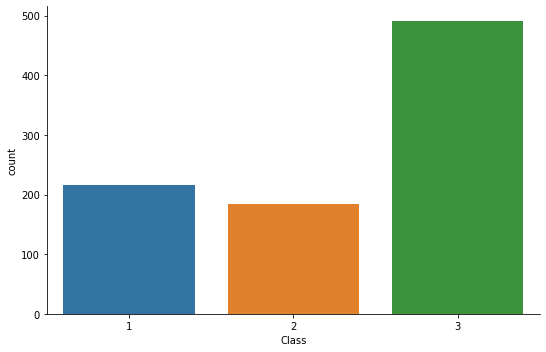

In [8]:
# Instead of a group by, using seaborn to plot the count of passengers in each class
fg = sns.factorplot('Pclass', data=titanic_df, kind='count', aspect=1.5)
fg.set_xlabels('Class')

In [9]:
titanic_df.groupby('Sex')['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

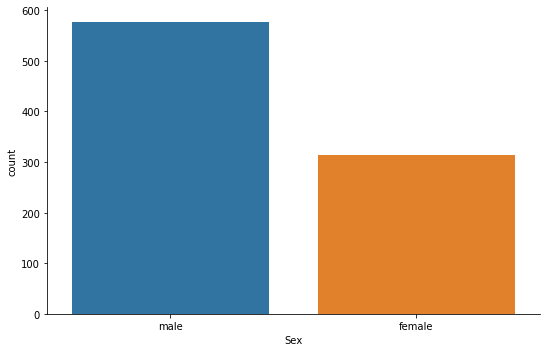

In [10]:
# Instead of a group by, using seaborn to plot the number of males and females
sns.factorplot('Sex', data=titanic_df, kind='count', aspect=1.5)

In [11]:
titanic_df.groupby(['Sex', 'Pclass'])['Sex'].count()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Sex, dtype: int64

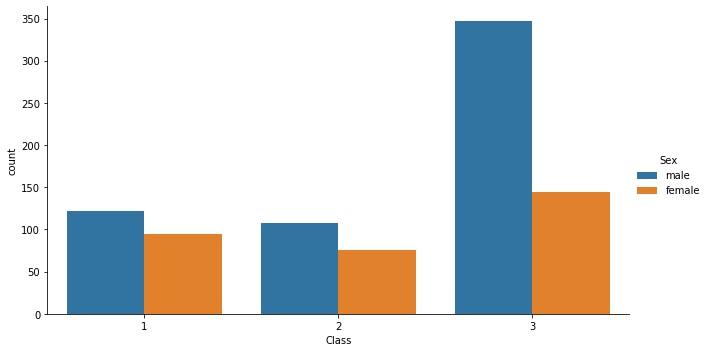

In [12]:
# With saeborn grouping by Sex and class
g = sns.factorplot('Pclass', data=titanic_df, hue='Sex', kind='count', aspect=1.75)
g.set_xlabels('Class')

As shown in the figure above, there are more than two times males than females in class 3. However in classes 1+2 the ratio of humans gender variance is minimal in comparison. 

In [13]:
# Number of passengers who survived in each class grouped by sex. Also total was found for each class grouped by sex.
titanic_df.pivot_table('Survived', 'Sex', 'Pclass', aggfunc=np.sum, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,91,70,72,233
male,45,17,47,109
All,136,87,119,342


In [14]:
not_survived = titanic_df[titanic_df['Survived']==0]

C:\Users\CSAS\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


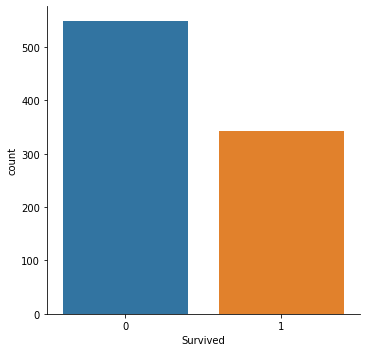

In [15]:
# Factoring plot of those survived vs. did not.
sns.factorplot('Survived', data=titanic_df, kind='count')

In [16]:
# Total number of passengers who did not survive 
len(not_survived)

549

In [17]:
# Number of passengers who did not survive in each class grouped by sex.
not_survived.pivot_table('Survived', 'Sex', 'Pclass', aggfunc=len, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,3,6,72,81
male,77,91,300,468
All,80,97,372,549


In [18]:
# Passengers who survived and who did not survive grouped by class & sex
table = pd.crosstab(index=[titanic_df.Survived,titanic_df.Pclass], columns=[titanic_df.Sex,titanic_df.Embarked])

In [19]:
table.unstack()

Sex      female                              male                           \
Embarked      C         Q          S            C         Q          S       
Pclass        1  2   3  1  2   3   1   2   3    1  2   3  1  2   3   1   2   
Survived                                                                     
0             1  0   8  0  0   9   2   6  55   25  8  33  1  1  36  51  82   
1            42  7  15  1  2  24  46  61  33   17  2  10  0  0   3  28  15   

Sex            
Embarked       
Pclass      3  
Survived       
0         231  
1          34

In [20]:
table.columns, table.index

(MultiIndex([('female', 'C'),
             ('female', 'Q'),
             ('female', 'S'),
             (  'male', 'C'),
             (  'male', 'Q'),
             (  'male', 'S')],
            names=['Sex', 'Embarked']),
 MultiIndex([(0, 1),
             (0, 2),
             (0, 3),
             (1, 1),
             (1, 2),
             (1, 3)],
            names=['Survived', 'Pclass']))

In [21]:
# Change name of columns
table.columns.set_levels(['Female', 'Male'], level=0, inplace=True)
table.columns.set_levels(['Cherbourg','Queenstown','Southampton'], level=1, inplace=True)
table

Sex                Female                             Male             \
Embarked        Cherbourg Queenstown Southampton Cherbourg Queenstown   
Survived Pclass                                                         
0        1              1          0           2        25          1   
         2              0          0           6         8          1   
         3              8          9          55        33         36   
1        1             42          1          46        17          0   
         2              7          2          61         2          0   
         3             15         24          33        10          3   

Sex                          
Embarked        Southampton  
Survived Pclass              
0        1               51  
         2               82  
         3              231  
1        1               28  
         2               15  
         3               34

In [22]:
print('Average and median age of passengers are %0.f and %0.f years old, respectively'%(titanic_df.Age.mean(), 
                                                                          titanic_df.Age.median()))

Average and median age of passengers are 30 and 28 years old, respectively


In [23]:
titanic_df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [24]:
# Drop missing values for the records in whichever age passenger is missing
age = titanic_df['Age'].dropna()

Text(0.5, 1.0, "Distribution of Passengers' Ages")

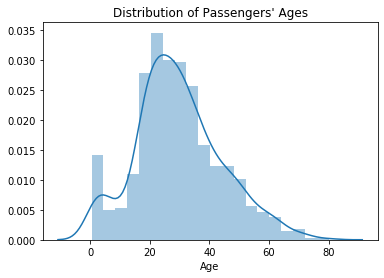

In [25]:
# Pictrorial Analysis: Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Passengers' Ages")

In [26]:
# Another way to plot a histogram of ages is shown below
# titanic_df['Age'].hist(bins=50)

In [27]:
titanic_df['Parch'].dtype, titanic_df['SibSp'].dtype, len(titanic_df.Cabin.dropna())

(dtype('int64'), dtype('int64'), 204)

In [28]:
# Create a function to define those who are children (less than 16)
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [29]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [30]:
# Lets have a look at the first 10 rows of the data frame
titanic_df[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


C:\Users\CSAS\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


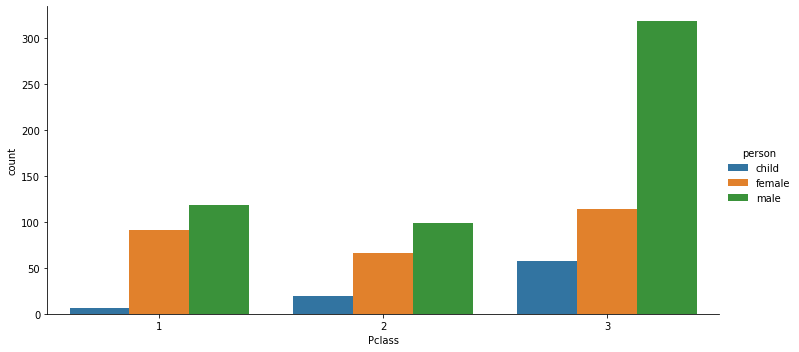

In [31]:
# Lets do a factorplot of passengers splitted into sex, children and class
sns.factorplot('Pclass', data=titanic_df, kind='count', hue='person', order=[1,2,3], 
               hue_order=['child','female','male'], aspect=2)

In [32]:
# Count number of men, women and children
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

C:\Users\CSAS\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


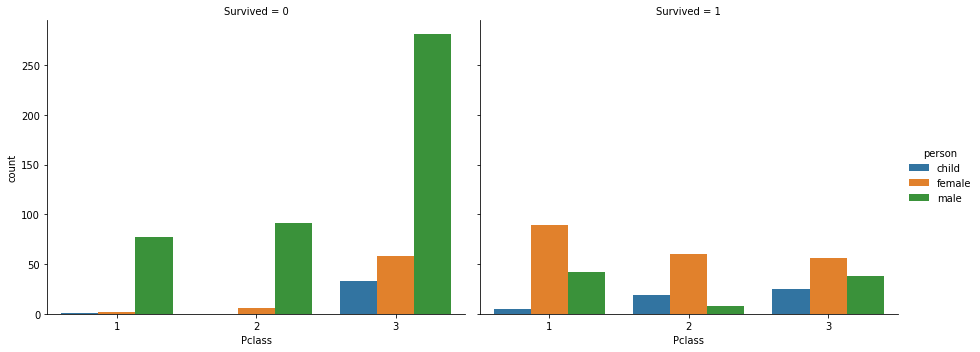

In [33]:
# Do the same as above, but split the passengers into either survived or not
sns.factorplot('Pclass', data=titanic_df, kind='count', hue='person', col='Survived', order=[1,2,3], 
               hue_order=['child','female','male'], aspect=1.25, size=5)

There are much more children in third class than there are in first and second class. However, one may expect that
there woould be more children in 1st and 2nd class than there are in 3rd class.

In [34]:
### kde plot, Distribution of Passengers' Ages

In [35]:
#### Grouped by Gender

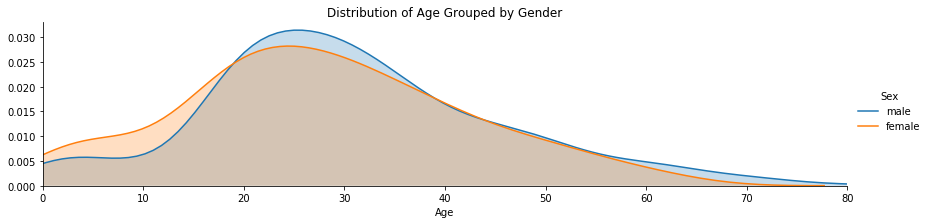

In [36]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

In [37]:
#### Grouped by Class

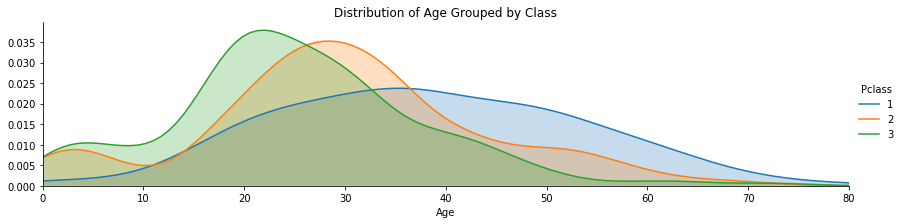

In [38]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Class')
fig.add_legend()

From the plot above, class 1 has a normal distribution. However, classes 2 and 3 have a skewed distribution towards
20 and 30-year old passengers.

In [39]:
#### What cabins did the Passengers stay in?

In [40]:
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [41]:
# Grab the first letter of the cabin letter
d = []
for c in deck:
    d.append(c[0])

In [42]:
d[0:10]

['C', 'C', 'E', 'G', 'C', 'D', 'A', 'C', 'B', 'D']

In [43]:
from collections import Counter
Counter(d)

Counter({'C': 59, 'E': 32, 'G': 4, 'D': 33, 'A': 15, 'B': 47, 'F': 13, 'T': 1})

In [44]:
# Now lets factorplot the cabins. First transfer the d list into a data frame. Then rename the column Cabin 
cabin_df = DataFrame(d)
cabin_df.columns=['Cabin']
sns.factorplot('Cabin', data=cabin_df, kind='count', order=['A','B','C','D','E','F','G','T'], aspect=2, 
              palette='winter_d')

NameError: name 'DataFrame' is not defined

In [ ]:
# Drop the 'T' cabin
cabin_df = cabin_df[cabin_df['Cabin'] != 'T']

In [ ]:
# Then replot the Cabins factorplot as above
sns.factorplot('Cabin', data=cabin_df, kind='count', order=['A','B','C','D','E','F','G'], aspect=2, 
              palette='Greens_d')

In [ ]:
# Below is a link to the list of matplotlib colormaps
url = 'http://matplotlib.org/api/pyplot_summary.html?highlight=colormaps#matplotlib.pyplot.colormaps'
import webbrowser
webbrowser.open(url)

In [ ]:
#### Where did the passengers come from i.e. Where did the passengers land into the ship from?

In [ ]:
sns.factorplot('Embarked', data=titanic_df, kind='count', hue='Pclass', hue_order=range(1,4), aspect=2,
              order = ['C','Q','S'])

From the figure above, one may conclude that almost all of the passengers who boarded from Queenstown were in third 
class. On the other hand, many who boarded from Cherbourg were in first class. The biggest portion of passengers 
who boarded the ship came from Southampton, in which 353 passengers were in third class, 164 in second class and 
127 passengers were in first class. In such cases, one may need to look at the economic situation at these different towns at that period of time to understand why most passengers who boarded from Queenstown were in third class for example.

In [ ]:
titanic_df.Embarked.value_counts()

In [ ]:
# For tabulated values, use crosstab pandas method instead of the factorplot in seaborn
port = pd.crosstab(index=[titanic_df.Pclass], columns=[titanic_df.Embarked])
port.columns = [['Cherbourg','Queenstown','Southampton']]

In [ ]:
port

In [ ]:
port.index

In [ ]:
port.columns

In [ ]:
port.index=[['First','Second','Third']]

In [ ]:
port

In [ ]:
#### Who was alone and who was with parents or siblings?

In [ ]:
titanic_df[['SibSp','Parch']].head()

In [ ]:
# Alone dataframe i.e. the passenger has no siblings or parents
alone_df = titanic_df[(titanic_df['SibSp'] == 0) & (titanic_df['Parch']==0)]
# Add Alone column
alone_df['Alone'] = 'Alone'
# Not alone data frame i.e. the passenger has either a sibling or a parent.
not_alone_df = titanic_df[(titanic_df['SibSp'] != 0) | (titanic_df['Parch']!=0)]
not_alone_df['Alone'] = 'With family'

# Merge the above dataframes
comb = [alone_df, not_alone_df]
# Merge and sort by index
titanic_df = pd.concat(comb).sort_index()

In [ ]:
[len(alone_df), len(not_alone_df)]

In [ ]:
# Show the first five records of the alone data frame
alone_df.head()

In [ ]:
# Show the first five rows of the not alone data frame
not_alone_df.head()

In [ ]:
titanic_df.head()

In [ ]:
fg=sns.factorplot('Alone', data=titanic_df, kind='count', hue='Pclass', col='person', hue_order=range(1,4),
                 palette='Blues')
fg.set_xlabels('Status')

From the figure above, it is clear that most children traveled with family in third class. For men, most traveled alone in third class. On the other hand, the number of female passengers who traveled either with family or alone among the second and third class is comparable. However, more women traveled with family than alone in first class. 

In [ ]:
titanic_df.head()

In [ ]:
#### Class Factor

In [ ]:
# Survived vs. class Grouped by gender
sns.factorplot('Pclass','Survived', hue='person', data=titanic_df, order=range(1,4), 
               hue_order = ['child','female','male'])

In [ ]:
From the figure above, being a male or a third class reduce the chance for one to survive. 

In [ ]:
sns.factorplot('Survivor', data=titanic_df, hue='Pclass', kind='count', palette='Pastel2', hue_order=range(1,4),
              col='person')

In [ ]:
### Age Factor

In [ ]:
# Linear plot of age vs. survived
sns.lmplot('Age', 'Survived', data=titanic_df)

In [ ]:
There seems to be a general linear trend between age and the survived field. The plot shows that the older the passenger is, the less chance he/she would survive.

In [ ]:
# Survived vs. Age grouped by Sex
sns.lmplot('Age', 'Survived', data=titanic_df, hue='Sex')

In [ ]:
Older women have higher rate of survival than older men as shown in the figure above. Also, older women has higher
rate of srvival than younger women; an opposite trend to the one for the male passengers.

In [ ]:
# Survived vs. Age gruped by class
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='winter', hue_order=range(1,4))

In [ ]:
In all three classes, the chance to survive reduced as the passengers got older.

In [ ]:
# Create a generation bin
generations = [10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,x_bins=generations, hue_order=[1,2,3])

In [ ]:
#### Deck Factor

In [ ]:
titanic_df.columns

In [ ]:
titanic_df = titanic_df.drop(subset=['Embarked'],titanic_df.replace(['¯\(ツ)/¯']))

In [ ]:
d[0:10]

In [ ]:
len(titanic_df), len(d)

In [ ]:
titanic_df['Deck'] = d

In [ ]:
titanic_df = titanic_df[titanic_df.Deck != 'T']

In [ ]:
titanic_df.head()

In [ ]:
sns.factorplot('Deck', 'Survived', data=titanic_df, order=['A','B','C','D','E','F','G'])

There does not seem to be any relation between deck and the survival rate as shown in the above figure!

In [ ]:
sns.factorplot('Alone', 'Survived', data=titanic_df, palette='winter') #hue='person', 
               #hue_order=['child', 'female', 'male'])

There seems that the survival rate diminishes significantly for those who were alone. However, lets check if a
gender or age play a factor. From the figure below, one may conclude that the survival rate for women and children
are much higher than that of men, as was concluded previously and as anticipated. However, the survival rate is not
significant for either gender or for children who were with family versus who were alone. Moreover, the survival 
rate for women and children increases for those who were alone. For men, the survival rate diminishes slightly 
for those who were alone versus for those who were with family.

In [ ]:
sns.factorplot('Alone', 'Survived', data=titanic_df, palette='winter', hue='person', 
               hue_order=['child', 'female', 'male'])

In [ ]:
# Lets split it by class now!
sns.factorplot('Alone', 'Survived', data=titanic_df, palette='summer', hue='person', 
               hue_order=['child', 'female', le'], col='Pclass', col_order=[1,2,3])